Dataset Loaded Successfully
   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                 

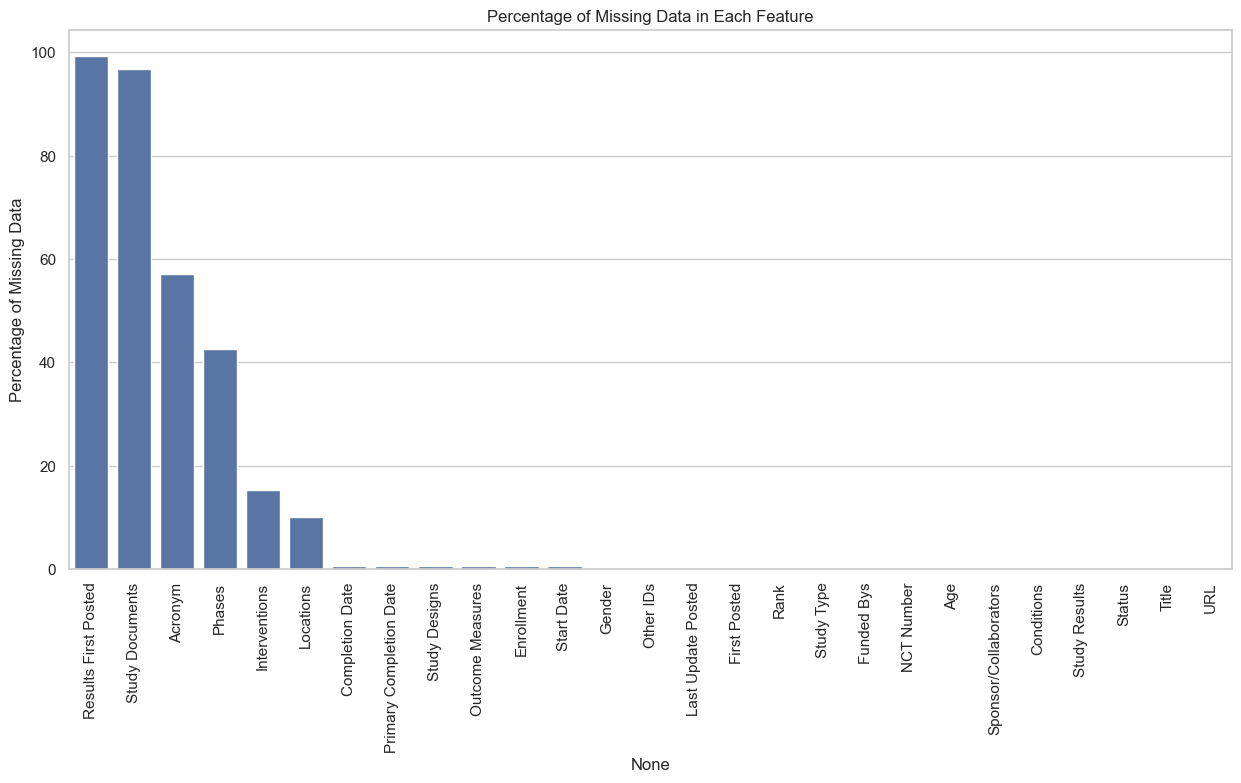


Dropped columns with very high missing values
Shape before dropping duplicates: (5783, 25)
Shape after dropping duplicates: (5783, 25)

Country feature created

Missing categorical values handled
Enrollment Skewness: 34.06593382031148
Enrollment missing values filled with median

Final Missing Data Percentage:
 Rank                       0.0
NCT Number                 0.0
Title                      0.0
Acronym                    0.0
Status                     0.0
Study Results              0.0
Conditions                 0.0
Interventions              0.0
Outcome Measures           0.0
Sponsor/Collaborators      0.0
Gender                     0.0
Age                        0.0
Phases                     0.0
Enrollment                 0.0
Funded Bys                 0.0
Study Type                 0.0
Study Designs              0.0
Other IDs                  0.0
Start Date                 0.0
Primary Completion Date    0.0
Completion Date            0.0
First Posted               0.0
Last

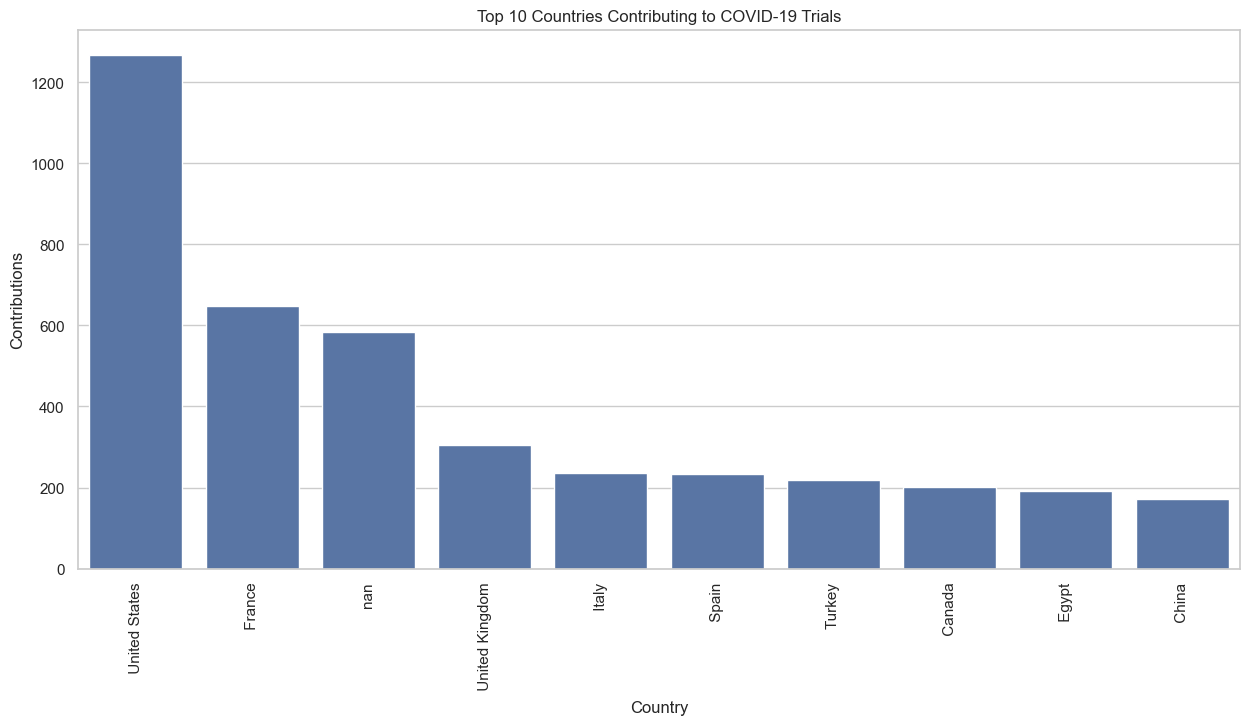

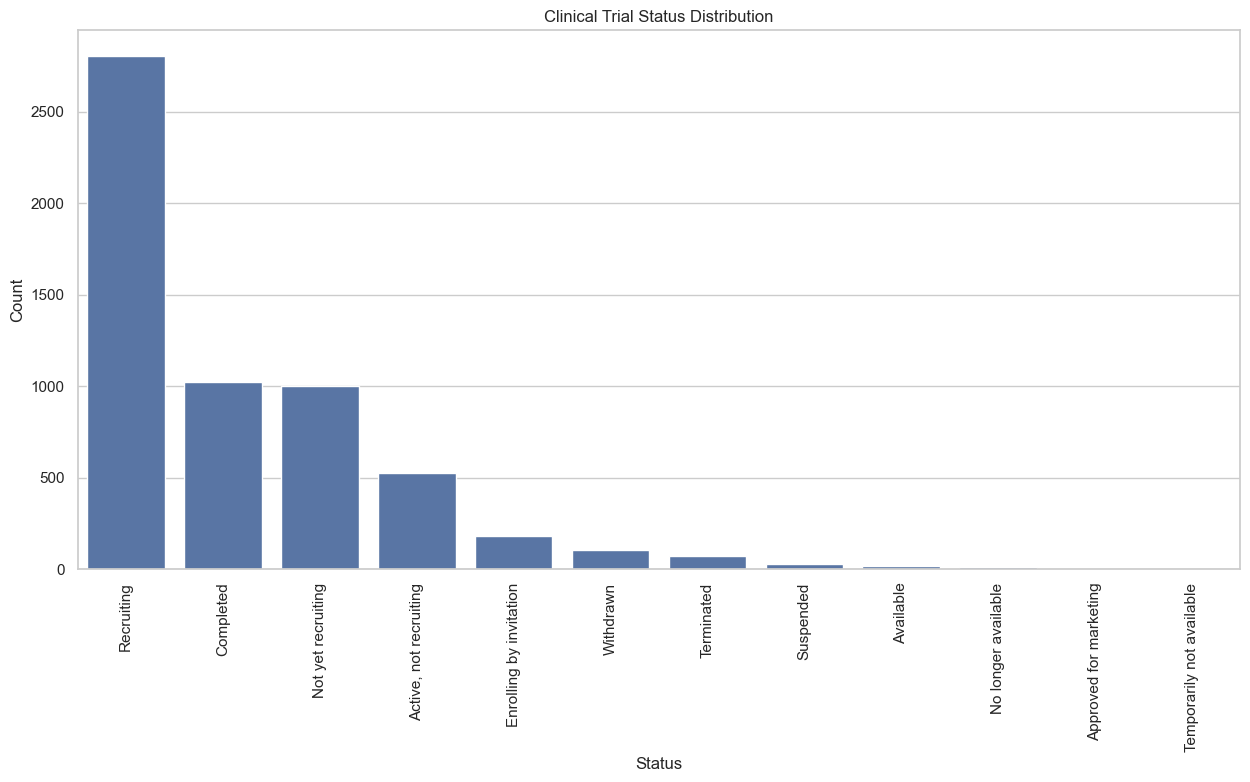

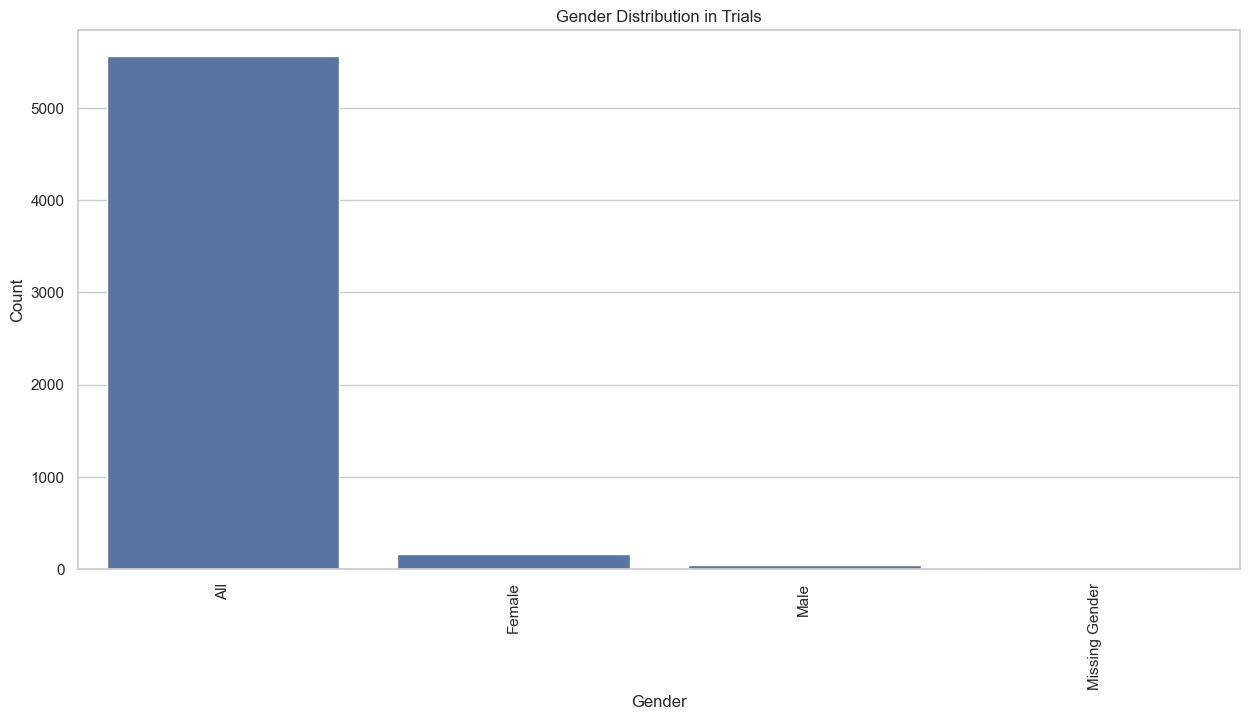

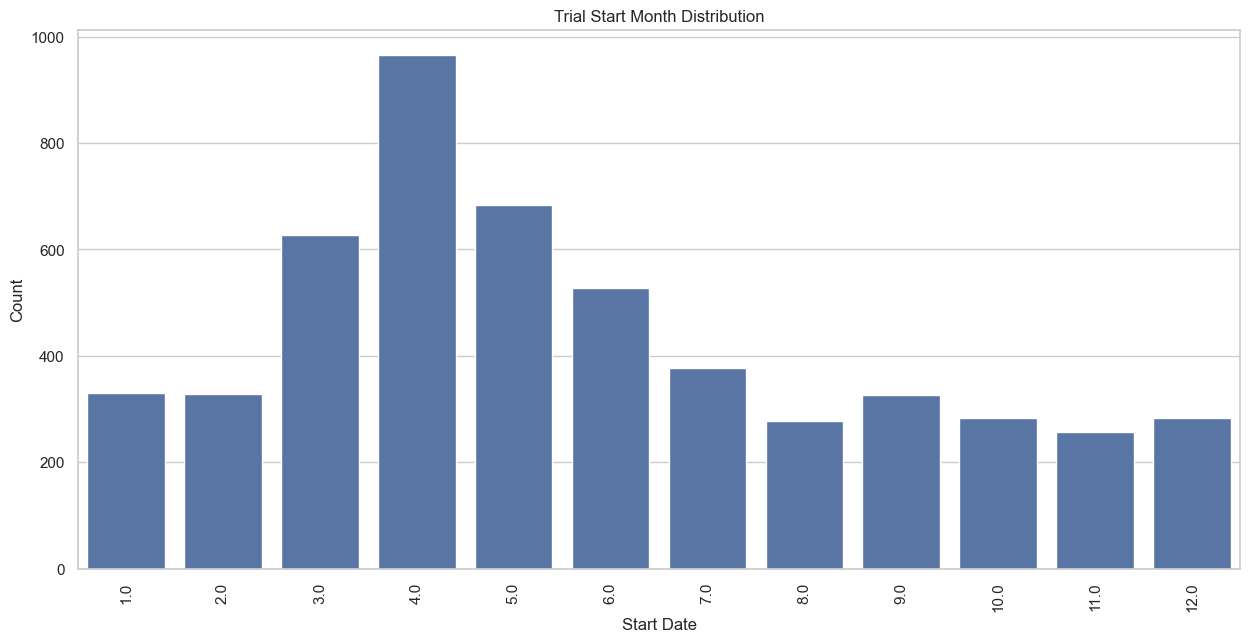


Final Dataset Shape: (5783, 26)
Unique NCT Numbers: 5783
Unique URLs: 5783

Cleaned dataset saved successfully!


In [6]:
# =========================================
# 1. IMPORT REQUIRED LIBRARIES
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


# =========================================
# 2. LOAD DATASET
# =========================================
# NOTE: Keep the CSV file in the same folder
df = pd.read_csv("COVID clinical trials.csv")

print("Dataset Loaded Successfully")
print(df.head())


# =========================================
# 3. BASIC DATA EXPLORATION
# =========================================
print("\nShape of Dataset:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nDataset Info:")
df.info()

print("\nCategorical Summary:")
print(df.describe(include='object'))

print("\nNumerical Summary:")
print(df.describe())


# =========================================
# 4. CHECK MISSING DATA (PERCENTAGE)
# =========================================
missing_data = df.isnull().mean() * 100
missing_data = missing_data.sort_values(ascending=False)
print("\nMissing Data Percentage:\n", missing_data)


# =========================================
# 5. VISUALIZE MISSING DATA (AS IN PDF)
# =========================================
def visualize_data(data, caption="", ylabel="Percentage of Missing Data"):
    plt.figure(figsize=(15, 7))
    sns.barplot(x=data.index[:40], y=data.values[:40])
    plt.xticks(rotation=90)
    plt.title(caption)
    plt.ylabel(ylabel)
    plt.show()

visualize_data(missing_data, "Percentage of Missing Data in Each Feature")


# =========================================
# 6. DROP HIGHLY MISSING COLUMNS
# =========================================
df.drop(['Results First Posted', 'Study Documents'], axis=1, inplace=True)
print("\nDropped columns with very high missing values")


# =========================================
# 7. REMOVE DUPLICATES & LOW-QUALITY ROWS
# =========================================
print("Shape before dropping duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

df.dropna(thresh=10, inplace=True)


# =========================================
# 8. FEATURE ENGINEERING – EXTRACT COUNTRY
# =========================================
df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1])
print("\nCountry feature created")


# =========================================
# 9. HANDLE MISSING DATA (CATEGORICAL – MAR)
# =========================================
categorical_features = df.select_dtypes(include='object').columns

for feature in categorical_features:
    if df[feature].isnull().sum() > 0:
        df[feature] = df[feature].fillna(f"Missing {feature}")

print("\nMissing categorical values handled")


# =========================================
# 10. HANDLE NUMERICAL MISSING DATA (ENROLLMENT)
# =========================================
print("Enrollment Skewness:", df['Enrollment'].skew())

median_enrollment = df['Enrollment'].median()
df['Enrollment'] = df['Enrollment'].fillna(median_enrollment)

print("Enrollment missing values filled with median")


# =========================================
# 11. FINAL MISSING DATA CHECK
# =========================================
print("\nFinal Missing Data Percentage:\n", df.isnull().mean() * 100)


# =========================================
# 12. DATA VISUALIZATION
# =========================================

# Top 10 Countries
top_10_countries = df['Country'].value_counts().head(10)
visualize_data(top_10_countries, "Top 10 Countries Contributing to COVID-19 Trials", "Contributions")

# Trial Status Distribution
status_counts = df['Status'].value_counts()
visualize_data(status_counts, "Clinical Trial Status Distribution", "Count")

# Gender Distribution
gender_counts = df['Gender'].value_counts()
visualize_data(gender_counts, "Gender Distribution in Trials", "Count")


# =========================================
# 13. START MONTH DISTRIBUTION
# =========================================
start_month = pd.to_datetime(df['Start Date'], errors='coerce').dt.month
start_month_distribution = start_month.value_counts().sort_index()

visualize_data(start_month_distribution, "Trial Start Month Distribution", "Count")


# =========================================
# 14. FINAL DATA VALIDATION
# =========================================
print("\nFinal Dataset Shape:", df.shape)
print("Unique NCT Numbers:", df['NCT Number'].nunique())
print("Unique URLs:", df['URL'].nunique())


# =========================================
# 15. SAVE CLEANED DATASET
# =========================================
df.to_csv("cleaned_covid_clinical_trials.csv", index=False)
print("\nCleaned dataset saved successfully!")
